# Clustering & Fitting

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, silhouette_score
from sklearn.preprocessing import StandardScaler


In [5]:
df = pd.read_csv('MallCustomers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Check for missing values
df.isnull().sum()

# Check the data types of the columns
df.dtypes


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
# Get a statistical summary of numerical columns
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


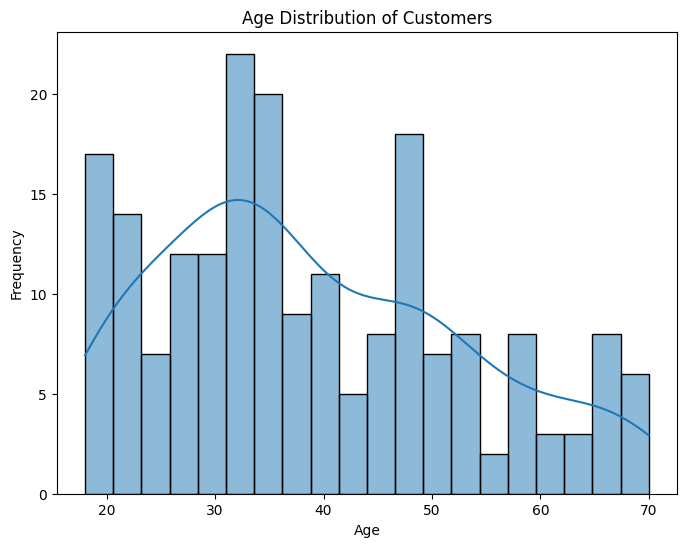

In [8]:
# Plotting histogram for Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


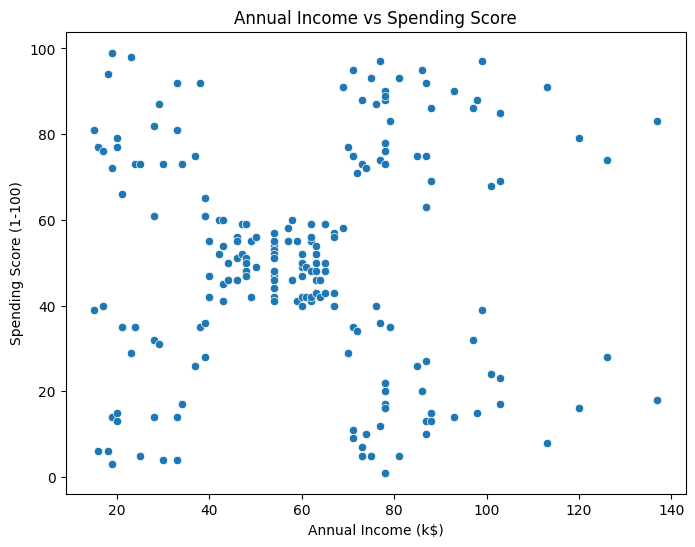

In [9]:
# Scatter plot between Annual Income and Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


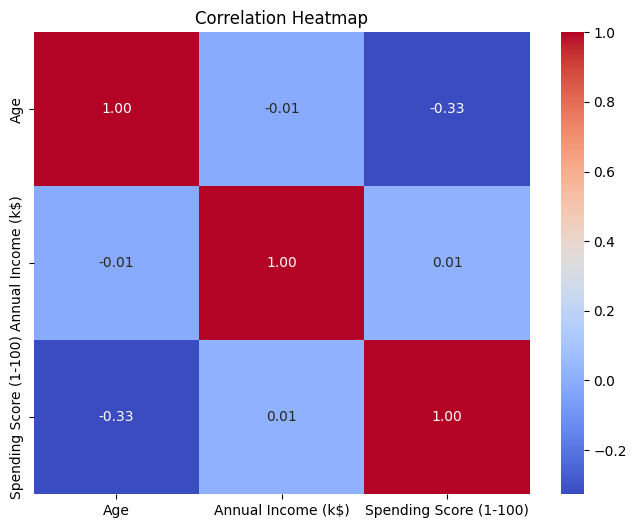

In [10]:
# Compute correlation matrix
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


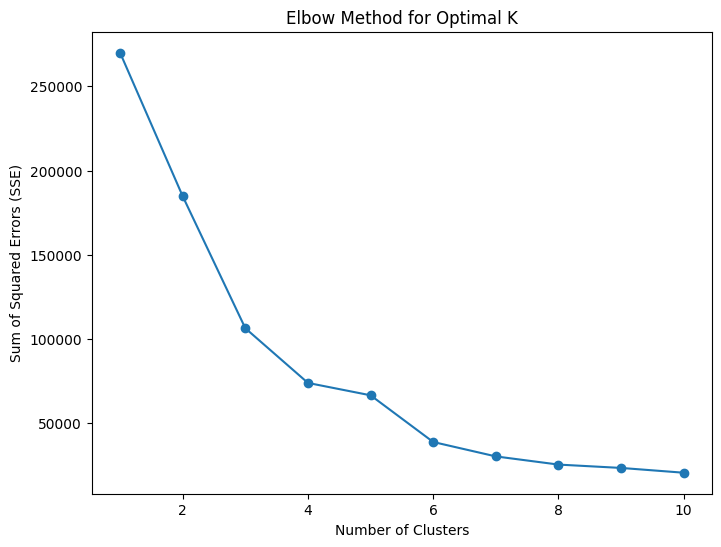

In [11]:
# Elbow method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()


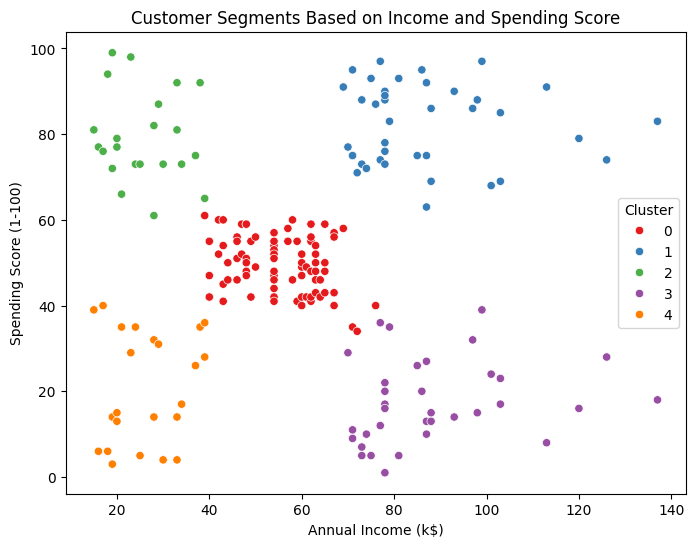

In [12]:
# Apply K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments Based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


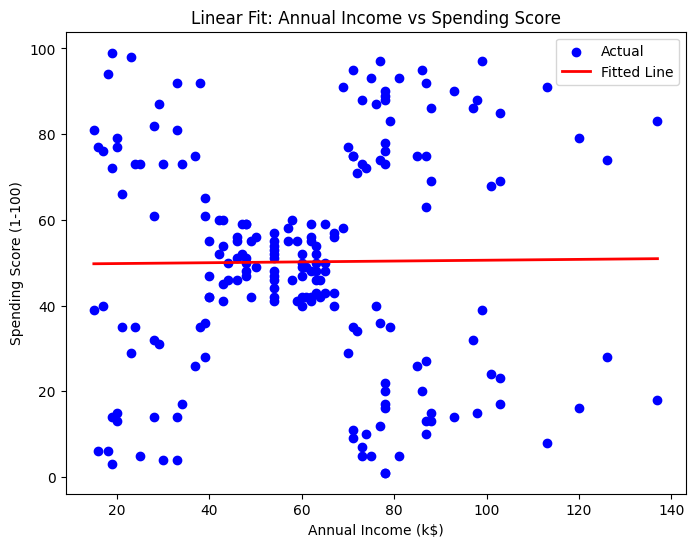

Intercept: 49.61035766442925, Slope: 0.009736498275606803


In [13]:
# Linear regression to predict Spending Score from Annual Income
X = df[['Annual Income (k$)']]
y = df['Spending Score (1-100)']

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Fitted Line')
plt.title('Linear Fit: Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Display model coefficients
print(f'Intercept: {model.intercept_}, Slope: {model.coef_[0]}')


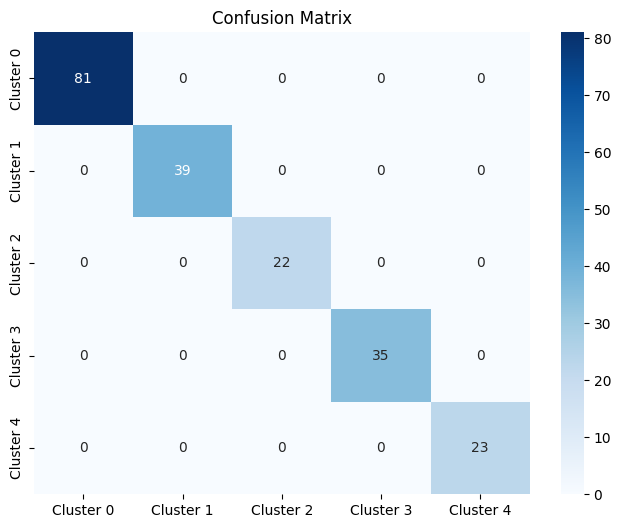

In [14]:
# Example: Assuming you have actual and predicted labels
y_true = df['Cluster']  # Replace with your actual labels if you have them
y_pred = df['Cluster']  # Replace with your predicted labels if you have them

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'], yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.title('Confusion Matrix')
plt.show()
